In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [63]:
house= pd.read_csv("Maison.csv")

In [64]:
house.shape

(546, 12)

In [65]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [66]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [67]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [68]:
house.nunique()

price        219
area         284
rooms          6
bathroom       4
floors         4
driveway       2
game_room      2
cellar         2
gas            2
air            2
garage         4
situation      2
dtype: int64

In [69]:
print("Rooms :", house.rooms.unique())
print("Bathroom :", house.bathroom.unique())
print("garage :", house.garage.unique())

Rooms : [3 2 4 1 5 6]
Bathroom : [1 2 3 4]
garage : [1 0 2 3]


In [70]:
house.dtypes

price        int64
area         int64
rooms        int64
bathroom     int64
floors       int64
driveway     int64
game_room    int64
cellar       int64
gas          int64
air          int64
garage       int64
situation    int64
dtype: object

In [71]:
house.isnull().sum()

price        0
area         0
rooms        0
bathroom     0
floors       0
driveway     0
game_room    0
cellar       0
gas          0
air          0
garage       0
situation    0
dtype: int64

In [72]:
house.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


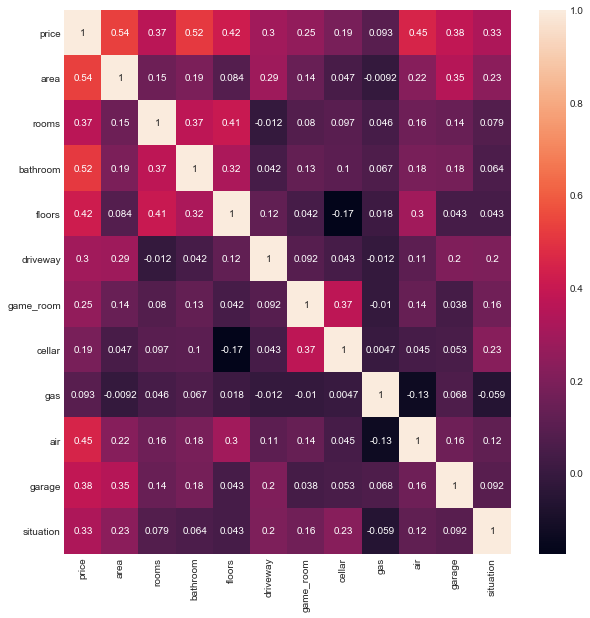

In [73]:
#corelation between the coloumns
plt.figure(figsize=(10, 10))
corr = house.corr(method="pearson")
sns.heatmap(corr, annot=True)

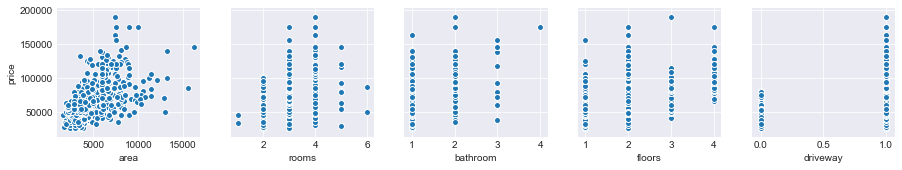

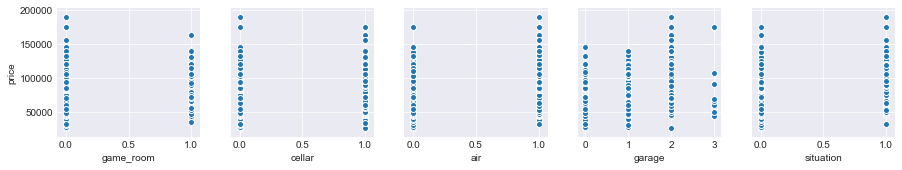

In [74]:
#so there is no strong corelation among 
#, 'driveway', 'game_room',
#                          'cellar', 'air', 'garage', 'situation'
plt.figure(figsize=(20, 20))
pp = sns.pairplot(data=house,
                  y_vars=['price'],
                  x_vars=['area', 'rooms', 'bathroom', 'floors', 'driveway'])

pp1 = sns.pairplot(data=house,
                  y_vars=['price'],
                  x_vars=['game_room', 'cellar', 'air', 'garage', 'situation'])

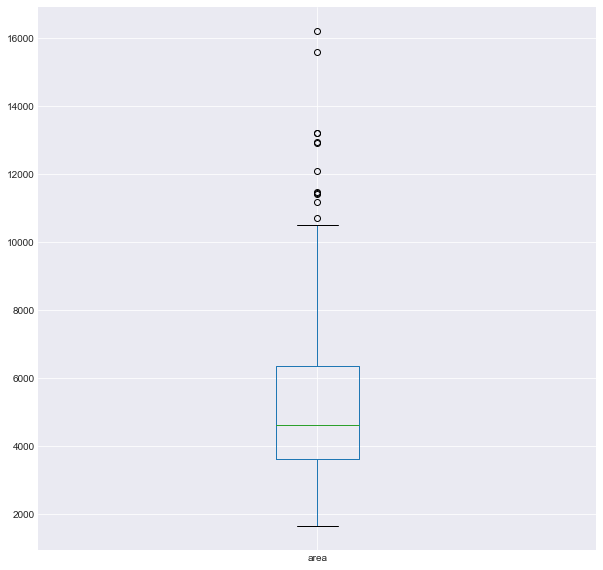

In [75]:
plt.figure(figsize=(10, 10))
boxplot = house.boxplot(column=['area'])

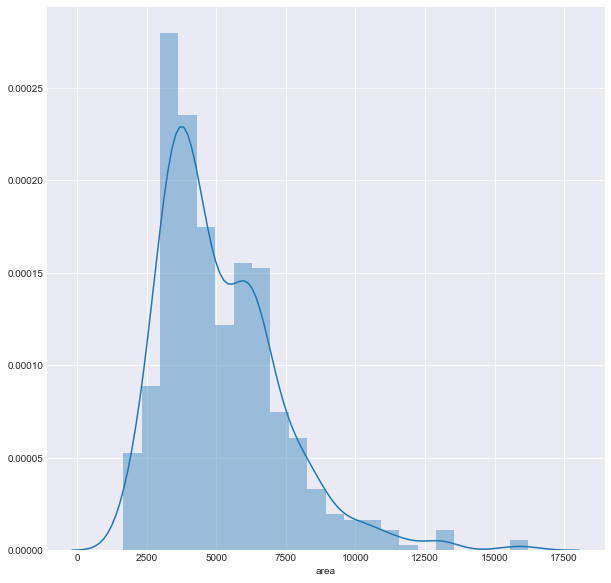

In [76]:
#Plotting distribution 
plt.figure(figsize=(10, 10))
sns.distplot(house['area'])

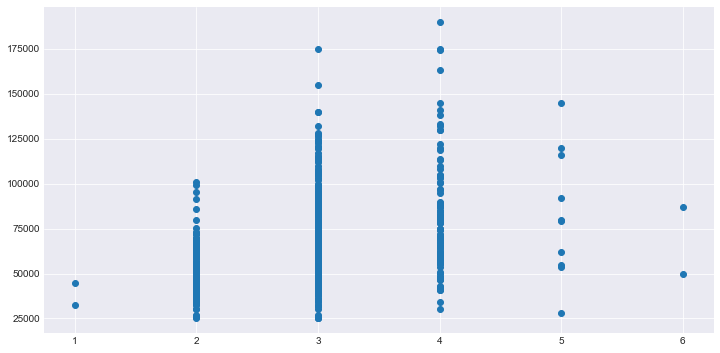

In [77]:
plt.scatter(house['rooms'], house['price'])
plt.show()

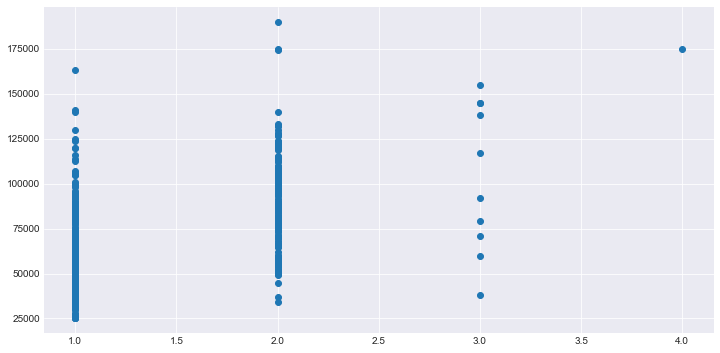

In [78]:
plt.scatter(house['bathroom'], house['price'])
plt.show()

In [79]:
#removing outliers
col = ['area']
def remove_outlier(Column_Name):
    q75 = house[Column_Name].quantile([.75])
    q75 = q75.values[0]
    q25 = house[Column_Name].quantile([.25])
    q25 = q25.values[0]
    IQR = q75-q25
    wlu = q75 + 1.5*IQR
    wll = q25-1.5*IQR
    count =  house[Column_Name][(house[Column_Name] > wlu ) | (house[Column_Name] < wll )].count()
    print("Total Outliers for " + Column_Name, count)
    house.loc[house[Column_Name]> wlu, Column_Name] = np.nan # replacing the outliers with NAN values
    house.loc[house[Column_Name]< wll, Column_Name] = np.nan # replacing the outliers with NAN values
    house[Column_Name].fillna(house[Column_Name].median(),inplace=True)

for i in col:
        remove_outlier(i)
print("Outliers Removed")
#remove_outlier("price")

Total Outliers for area 12
Outliers Removed


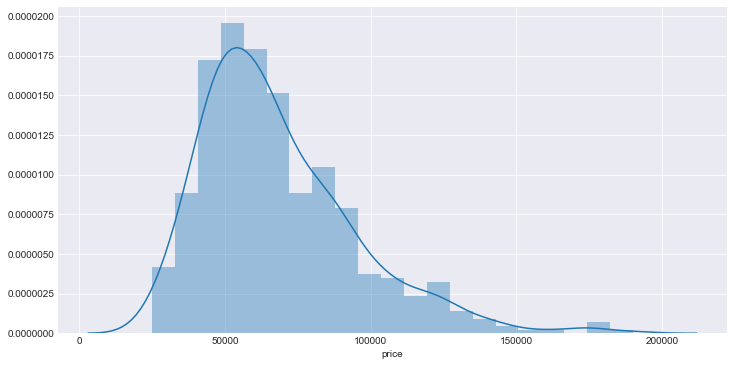

In [80]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()

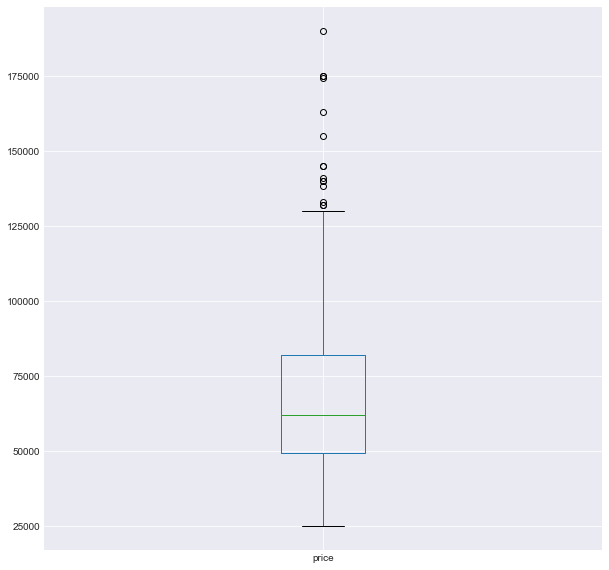

In [81]:
plt.figure(figsize=(10, 10))
boxplot = house.boxplot(column=['price'])

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [83]:
lm = LinearRegression()

In [84]:
house1 = house

In [85]:
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'air', 'garage', 'situation']]
y = house['price']

In [86]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)
X.head()

,area,rooms,bathroom,floors,driveway,game_room,cellar,air,garage,situation
0,5850.0,3,1,2,1,0,1,0,1,0
1,4000.0,2,1,1,1,0,0,0,0,0
2,3060.0,3,1,1,1,0,0,0,0,0
3,6650.0,3,1,2,1,1,0,0,0,0
4,6360.0,2,1,1,1,0,0,0,0,0


In [87]:
import statsmodels.api as sm

In [88]:
res = sm.OLS(y_train, X_train)

In [89]:
log = res.fit()
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     845.0
Date:                Thu, 13 Jun 2019   Prob (F-statistic):          9.23e-274
Time:                        17:22:32   Log-Likelihood:                -4847.3
No. Observations:                 436   AIC:                             9715.
Df Residuals:                     426   BIC:                             9755.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
area           3.3690      0.485      6.945      0.000       2.416       4.322
rooms       2058.7593   1006.878      2.045      0.041      79.692    4037.827
bathroom    1.483e+04   1740.292      8.522      0.000    1.14e+04    1.83e+04
floors      5971.5530   1075.250      5.554      0.000    3858.098    8085.008
driveway    4409.3339   2318.214      1.902      0.058    -147.227    8965.895
game_room   4441.2864   2247.603      1.976      0.049      23.515    8859.058
cellar      3336.6308   1905.255      1.751      0.081    -408.241    7081.502
air         1.255e+04   1842.189      6.813      0.000    8929.648    1.62e+04
garage      4918.6821    981.334      5.012      0.000    2989.824    6847.541
situation   1.101e+04   1955.917      5.631      0.000    7168.760    1.49e+04
==============================================================================
Omnibus:                       85.874   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.982
Skew:                           0.978   Prob(JB):                     5.64e-47
Kurtosis:                       5.810   Cond. No.                     1.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
predictions = log.predict(X_test)

In [91]:
predictions.head()    

225    78020.313449
18     38893.522962
48     57690.687823
355    81915.804980
350    64606.012064
dtype: float64

In [92]:
#Saving the predicted values in CSV
X_test.insert(loc=10, column="Actual", value=y_test)
X_test.insert(loc=11, column="Predicted", value=predictions)

In [39]:
X_test.to_csv(path_or_buf="ActualvsPredicted.csv", index=False)